In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
bb100.apply(pd.Series.nunique)

url                        3279
WeekID                     3279
Week Position               100
Song                      24360
Performer                 10061
SongID                    29389
Instance                     10
Previous Week Position      100
Peak Position               100
Weeks on Chart               87
dtype: int64

In [4]:
#Number of Weeks in the Billboard Top 100 Dataset from 1958 to 2021
bb100.apply(pd.Series.nunique)[0]

3279

In [5]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [6]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [7]:
#Billboard Top #1 By Week from 1958 to 2021
bb1 = bb100[bb100['Week Position']==1].copy()
bb1.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
944,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
22342,http://www.billboard.com/charts/hot-100/1958-08-09,1958-08-09,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,1.0,1,2
232960,https://www.billboard.com/charts/hot-100/2021-05-22,2021-05-22,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & Anderson .Paak),1,2.0,1,10
3522,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,1,Good 4 U,Olivia Rodrigo,Good 4 UOlivia Rodrigo,1,NaN,1,1


In [8]:
bb1['Song'].replace({'Candle In The Wind 1997/Something About The Way You Look Tonight':'Candle In The Wind'}, inplace=True)
bb1['Song'].replace({'Macarena (Bayside Boys Mix)':'Macarena'}, inplace=True)
bb1['Song'].replace({'End Of The Road (From "Boomerang")':'End Of The Road'}, inplace=True)

In [9]:
bb1_counter = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
bb1_counter = bb1_counter.rename(columns = {'index':'SongID'})
bb1_counter = bb1_counter.iloc[0:15]
bb1_counter.iloc[10]

SongID    End Of The Road (From "Boomerang")Boyz II Men
Count                                                13
Name: 10, dtype: object

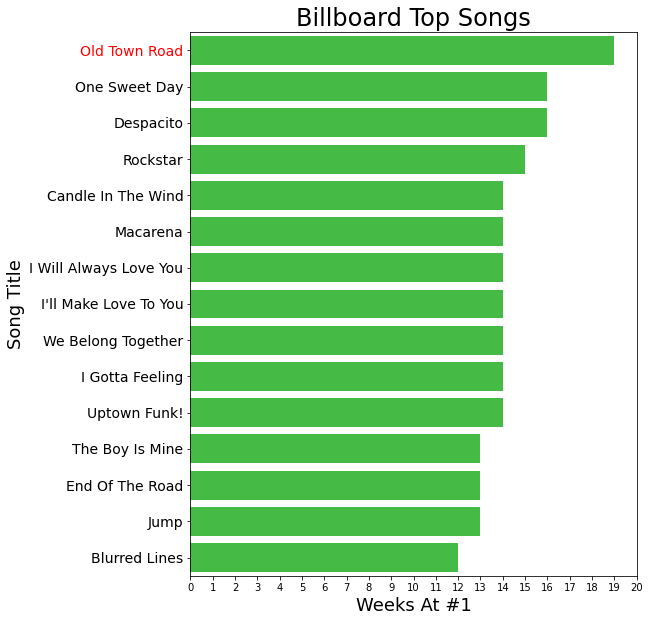

In [10]:
#sns.countplot(y='SongID', data=bb1)
plt.figure(figsize=(8,10))
plt.title('Billboard Top Songs', fontsize=24)
sns.countplot(y='Song', data=bb1, order=pd.value_counts(bb1['Song']).iloc[:15].index, color='limegreen')
plt.xlabel('Weeks At #1', fontsize=18)
plt.ylabel('Song Title', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,21,1))
plt.gca().get_yticklabels()[0].set_color("red")
plt.savefig('Top1s.png', bbox_inches='tight', pad_inches=2);

In [ ]:
bb1_counters = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
bb1_counters = bb1_counters.rename(columns = {'index':'SongID'})
bb1_counters

In [ ]:
sns.displot(x=bb1_counters['Count'], bins=21, height=7, aspect=1.7)
plt.xlabel('Total Weeks', fontsize=15)
plt.ylabel('Number Of Songs', fontsize=15)
plt.title('Holding Onto #1 Spot', fontsize=20)
plt.xticks(np.arange(0,20,1))
plt.savefig('SongsOne.png', bbox_inches='tight', pad_inches=2);

In [ ]:
sns.boxplot(x=bb1_counter['Count'], width=0.8)
plt.xlabel('Total Weeks', fontsize=15)
plt.title('Number Of Weeks in #1 Spot', fontsize=20)
plt.xticks(np.arange(0,20,1))
sns.set(rc={'figure.figsize':(14,6)});

In [ ]:
#Cross check values of boxplot via describe()
bb1_counter.describe()

In [ ]:
#Cross check shape of dataframe vs 'count', total count vs url weeks
print(bb1_counter.shape)
print(bb1_counter.Count.sum())

In [ ]:
#Any song which has been ranked #1 for more than 8 weeks is an OUTLIER
#Which ones are they? 

Outliers = bb1_counter[bb1_counter['Count']>8].copy()
Outliers.describe()

In [ ]:
Outliers

In [ ]:
outlier_features = pd.merge(Outliers, features, on='SongID', how='left')
outlier_features

In [ ]:
#Sum the Null Values by Column: 
outlier_features.isnull().sum()

In [ ]:
#Get 'Old Town Road' preview URL:
OTR = outlier_features['spotify_track_preview_url'].iloc[0]
OTR

In [ ]:
#Download URL and save as MP3 file: 
import urllib.request
url = OTR
filename = 'Old_Town_Road.mp3'
urllib.request.urlretrieve(url, filename)

In [ ]:
#Play MP3 file: 
from IPython.display import Audio
Audio('Old_Town_Road.mp3')

In [ ]:
outlier_comp_features = outlier_features[['SongID','danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
outlier_comp_features = outlier_comp_features.iloc[1: , :]
outlier_comp_features

In [ ]:
outlier_comp_features[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

In [ ]:
#Billboard Bottom '99' By Week from 1958 to 2021

bb99 = bb100[bb100['Week Position']!=1].copy()
bb99.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

In [ ]:
bb99 = bb99[bb99['Peak Position']!=1].copy()
print(bb99['Peak Position'].min())
bb99.sort_values(by='Peak Position')

In [ ]:
bb99 = bb99['SongID'].value_counts().to_frame().reset_index()
bb99 = bb99.rename(columns = {'index':'SongID', 'SongID':'Frequency'})
bb99

In [ ]:
features_99 = pd.merge(bb99, features, on='SongID', how='left')
features_99

In [ ]:
features_99[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

In [ ]:
outlier_comp_features[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

In [ ]:
#One option is to do Radar Plot between outliers vs rest. Is there a significant difference??
#Is this worth it? Is there much difference? Can it tell a story? Unclear. 

In [ ]:
#extract the upper and lower quantiles
lq = bb1_counter['Count'].quantile(0.25)
uq = bb1_counter['Count'].quantile(0.75)
iqr = uq - lq
upper_bound = uq + 1.5*iqr

print(lq)
print(uq)
print(iqr)
print(upper_bound)

#extract values outside these bounds 
#Pokemon_IQR_outliers = pokemon[(pokemon.HP <= lower_bound) | (pokemon.HP >= upper_bound)]
#Pokemon_IQR_outliers

In [ ]:
#ECDF to keep in mind for future use:
sns.displot(bb1_counter, x='Count', kind='ecdf');